In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [6]:
class PCA:

  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    # components contains eigvectors


  def fit(self, X):
    
    # covariance matrix
    cov = np.cov(X.T)
    # give an input where each row represents a feature, with observations in the columns.

    # eigenvalues, eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    # eigenvalue represents variance in data. More the eigen value, more variance, more importance
    # Column v[:,i] is the eigenvector corresponding to the eigenvalue[i].

    # sort eigenvectors
    eigenvectors = eigenvectors.T
    # each row, eigenvector[i] contains an eigen vector corresponding to the eigenvalue[i]
    indices = np.argsort(eigenvalues)[::-1] # indices in desc order of eigen values
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[indices]

    # store first n_components eigen vectors
    self.components = eigenvectors[:self.n_components]


  def transform(self, X):
    
    # project data
    # each row contains an eigen vector
    # each column in self.components.T contains an eigen vector
    X = sc.transform(X)

    # Matrix * V(Eigen_vector_i)
    return np.dot(X, self.components.T)

In [7]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [8]:
X_projected

array([[-6.54579149,  7.70892008],
       [-5.9851502 , 10.26603967],
       [-6.44235997,  9.39913424],
       [-6.33863195,  9.94222244],
       [-6.76502128,  7.27507177],
       [-6.63520664,  5.56007709],
       [-6.68769537,  8.4636362 ],
       [-6.46081368,  8.25279949],
       [-6.22492695, 11.03235484],
       [-6.20700156,  9.78758807],
       [-6.58299541,  6.56337653],
       [-6.59506565,  8.36283057],
       [-6.15952416, 10.33304987],
       [-6.59828022, 10.61247919],
       [-6.76142775,  4.87632718],
       [-7.15684726,  2.94912877],
       [-6.71020746,  5.56324189],
       [-6.44791862,  7.69732102],
       [-6.36084756,  5.89470218],
       [-6.8573545 ,  6.22875144],
       [-6.11730892,  8.02957251],
       [-6.61675293,  6.70641184],
       [-7.14602645,  7.49988114],
       [-5.91046487,  8.65026822],
       [-6.53881504,  8.36045697],
       [-5.8711487 , 10.20904612],
       [-6.24631773,  8.22881017],
       [-6.4505402 ,  7.65271774],
       [-6.32656171,

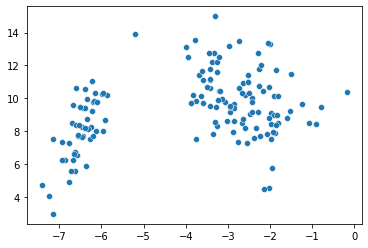

In [11]:
sns.scatterplot(X_projected[:, 0], X_projected[:, 1])